# Задание 1. Анализ информационных моделей

## Поиск оптимального маршрута по таблице

### Задача [7662](https://inf-ege.sdamgia.ru/problem?id=7662)

Между населёнными пунктами $A, B, C, D, E, F$ построены дороги, протяжённость которых приведена в таблице. Отсутствие числа в таблице значает, что прямой дороги между пунктами нет.


$$
\require{color}
\begin{array}{c|c|c|c|c|c|c|}
  & \color{NavyBlue}A & \color{NavyBlue}B & \color{NavyBlue}C & \color{NavyBlue}D & \color{NavyBlue}E & \color{NavyBlue}F \\
\hline
\color{NavyBlue}A  & \color{BrickRed}\times & 2 & 4 & 8 &   & 16 \\
\hline
\color{NavyBlue}B &  2 & \color{BrickRed}\times &   & 3 &   &    \\
\hline
\color{NavyBlue}C &  4 &   & \color{BrickRed}\times & 3 &   &    \\
\hline
\color{NavyBlue}D &  8 & 3 & 3 & \color{BrickRed}\times &   & 3  \\
\hline
\color{NavyBlue}E &    &   &   & 8 & \color{BrickRed}\times & 5  \\
 \hline
\color{NavyBlue}F & 16 &   &   & 3 &   & \color{BrickRed}\times  \\
\hline
\end{array}
$$


Найдите корень уравнения $\log_{2}\left(4-x\right)=7$.

$$\noindent Найдите площадь поверхности многогранника, изображённого на рисунке. Все двугранные углы многогранника прямые.
$$

In [ ]:
edges = [(0, 1), (0, 2), (0, 3), (0, 5)]

## Сопоставление городов

### Задача

На рисунке схема дорог изображена в виде графа, в таблице содержатся
сведения о длине этих дорог в километрах.

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

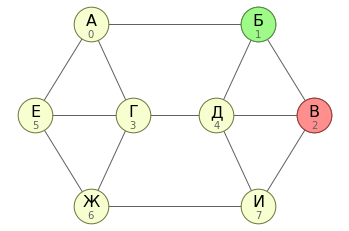

In [ ]:
d = {
     'А': 'БГЕ',
     'Б': 'АВД', 
     'В': 'БДИ', 
     'Г': 'АЕЖД',
     'Д': 'БВГИ',
     'Е': 'АГЖ',
     'Ж': 'ЕГИ',
     'И': 'ВДЖ'
     }


G = nx.Graph()
for node in d:
    G.add_node(node, index='АБВГДЕЖИ'.index(node))
    for parent in d[node]:
        G.add_node(parent, index='АБВГДЕЖИ'.index(parent))
        G.add_edge(parent, node, weight=10, label=node)


pos = {
 'А': [1, 1],
 'Б': [4, 1],
 'В': [5, 0],
 'Г': [1.75, 0 ],
 'Д': [3.25, 0],
 'Е': [0, 0],
 'Ж': [1, -1],
 'И': [4, -1],
}

def shift_pos(pos, dx, dy):
    pos1 = pos.copy()
    for k in pos1:
        pos1[k] = pos[k][:]
        pos1[k][0] += dx
        pos1[k][1] += dy
    return pos1

options = {"node_size": 1200, "alpha": 1,  }
labels = dict(zip(G.nodes, G.nodes))
nx.draw_networkx_nodes(G, pos, node_color="#f7ffd1", linewidths=1.0, edgecolors='#6d773c', **options)
nx.draw_networkx_nodes(G, pos, nodelist=['Б'], node_color="#9ffb88", linewidths=1.0, edgecolors='#558a48', **options)
nx.draw_networkx_nodes(G, pos, nodelist=['В'], node_color='#ff8f8f', edgecolors='#9a3636', **options)
nx.draw_networkx_edges(G, pos, width=1, alpha=1, edge_color="#616161", arrowstyle='->', arrowsize=15, node_size=100)
nx.draw_networkx_labels(G, shift_pos(pos, 0, 0.04), labels, font_size=16)
nx.draw_networkx_labels(G, shift_pos(pos, 0, -0.11), dict(G.nodes.data('index')), font_size=10, font_color='#616161')
plt.axis("off")
plt.ylim(-1.2, 1.2)
plt.xlim(-0.5, 5.5)
plt.show()

In [ ]:
G.nodes.data('index')

NodeDataView({'А': 0, 'Б': 1, 'Г': 3, 'Е': 5, 'В': 2, 'Д': 4, 'И': 7, 'Ж': 6}, data='index')

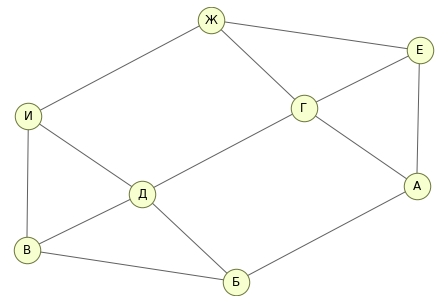

In [ ]:

pos = nx.layout.spring_layout(G)
nx.drawing.draw(G, pos, **{
    'node_size': 700,
    "node_color": '#f7ffd1',
    "edge_color": '#616161',
    "width": 1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    'cmap': plt.cm.BrBG,
    'edgecolors': '#6d773c'
})


In [ ]:
labels = dict(zip(range(8), ['П1','П2','П3','П4','П5','П6','П7','П8']))
A = np.array([
     [0,0,0,14,37,0,25,0],
     [0,0,18,0,24,0,0,29],
     [0,18,0,42,23,0,0,21],
     [14,0,42,0,0,20,17,0],
     [37,24,23,0,0,0,0,0],
     [0,0,0,20,0,0,28,30],
     [25,0,0,17,0,28,0,0],
     [0,29,21,0,0,30,0,0]
     ])

G1 = nx.Graph(A)

for node in G1.nodes():
    G1.nodes()[node]['label'] = labels[node]
    G1.nodes()[node]['index'] = node

In [ ]:
labels

{0: 'П1', 1: 'П2', 2: 'П3', 3: 'П4', 4: 'П5', 5: 'П6', 6: 'П7', 7: 'П8'}

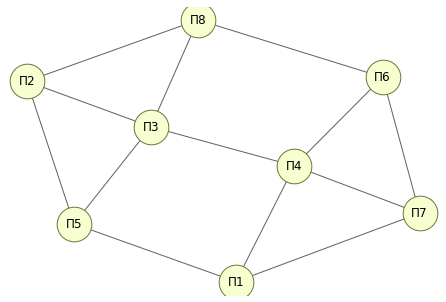

In [ ]:
pos = nx.layout.spring_layout(G1)
nx.drawing.draw(G1, pos, **{
    'node_size': 1200,
    "node_color": '#f7ffd1',
    "edge_color": '#616161',
    "width": 1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    'cmap': plt.cm.BrBG,
    'edgecolors': '#6d773c',
    'labels': labels
})

In [ ]:
for node in G1.nodes():
    G1.nodes()[node]['label'] = labels[node]
    G1.nodes()[node]['index'] = node
    print(G1.nodes()[node])

{'label': 'П1', 'index': 0}
{'label': 'П2', 'index': 1}
{'label': 'П3', 'index': 2}
{'label': 'П4', 'index': 3}
{'label': 'П5', 'index': 4}
{'label': 'П6', 'index': 5}
{'label': 'П7', 'index': 6}
{'label': 'П8', 'index': 7}


In [ ]:
edge_labels = [((edge[0], edge[1]), edge) for edge in G1.edges().data()]
edge_labels

[((0, 3), (0, 3, {'weight': 14})),
 ((0, 4), (0, 4, {'weight': 37})),
 ((0, 6), (0, 6, {'weight': 25})),
 ((1, 2), (1, 2, {'weight': 18})),
 ((1, 4), (1, 4, {'weight': 24})),
 ((1, 7), (1, 7, {'weight': 29})),
 ((2, 3), (2, 3, {'weight': 42})),
 ((2, 4), (2, 4, {'weight': 23})),
 ((2, 7), (2, 7, {'weight': 21})),
 ((3, 5), (3, 5, {'weight': 20})),
 ((3, 6), (3, 6, {'weight': 17})),
 ((5, 6), (5, 6, {'weight': 28})),
 ((5, 7), (5, 7, {'weight': 30}))]

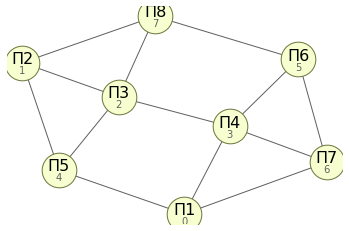

In [ ]:
options = {"node_size": 1200, "alpha": 1,  }
pos2 = {
 'А': [1, 1],
 'Б': [4, 1],
 'В': [5, 0],
 'Г': [1.75, 0 ],
 'Д': [3.25, 0],
 'Е': [0, 0],
 'Ж': [1, -1],
 'И': [4, -1],
}
nx.draw_networkx_nodes(G1, pos, node_color="#f7ffd1", linewidths=1.0, edgecolors='#6d773c', **options)
#nx.draw_networkx_nodes(G1, pos, nodelist=['Б'], node_color="#9ffb88", linewidths=1.0, edgecolors='#558a48', **options)
#nx.draw_networkx_nodes(G1, pos, nodelist=['В'], node_color='#ff8f8f', edgecolors='#9a3636', **options)
nx.draw_networkx_edges(G1, pos, width=1, alpha=1, edge_color="#616161", arrowstyle='->', arrowsize=15, node_size=100)
nx.draw_networkx_labels(G1, shift_pos(pos, 0, 0.04), labels, font_size=16)
nx.draw_networkx_labels(G1, shift_pos(pos, 0, -0.11), dict(G1.nodes.data('index')), font_size=10, font_color='#616161')
plt.axis("off")
#plt.ylim(-1.2, 1.2)
#plt.xlim(-0.5, 5.5)
plt.show()

In [ ]:
dict(G1.nodes())

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}}

In [ ]:
nx.is_isomorphic(G, G1, node_match=lambda n1, n2: n1['index'] == n2['index'])

False

In [ ]:
A

array([[ 0,  0,  0, 14, 37,  0, 25,  0],
       [ 0,  0, 18,  0, 24,  0,  0, 29],
       [ 0, 18,  0, 42, 23,  0,  0, 21],
       [14,  0, 42,  0,  0, 20, 17,  0],
       [37, 24, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0, 28, 30],
       [25,  0,  0, 17,  0, 28,  0,  0],
       [ 0, 29, 21,  0,  0, 30,  0,  0]])

In [ ]:
A[[0,1,2,3,4,5,7,6], :][:, [0,1,2,3,4,5,7,6]]

array([[ 0,  0,  0, 14, 37,  0,  0, 25],
       [ 0,  0, 18,  0, 24,  0, 29,  0],
       [ 0, 18,  0, 42, 23,  0, 21,  0],
       [14,  0, 42,  0,  0, 20,  0, 17],
       [37, 24, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0, 30, 28],
       [ 0, 29, 21,  0,  0, 30,  0,  0],
       [25,  0,  0, 17,  0, 28,  0,  0]])

In [ ]:
from itertools import permutations

perm = []
for p in permutations(range(8)):
    B = A[list(p), :][:, list(p)]
    G2 = nx.Graph(B)

    for node in G2.nodes():
        G2.nodes()[node]['index'] = node
    if nx.is_isomorphic(G, G2, node_match=lambda n1, n2: n1['index'] == n2['index']):
        print(p)

(0, 4, 1, 3, 2, 6, 5, 7)
(4, 0, 6, 2, 3, 1, 7, 5)
(5, 7, 1, 3, 2, 6, 0, 4)
(7, 5, 6, 2, 3, 1, 4, 0)
